In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
android_devices = pd.read_csv('cell_data/android_devices.csv')
user_device = pd.read_csv('cell_data/user_device.csv')
user_usage = pd.read_csv('cell_data/user_usage.csv')

In [25]:
user_device2 = user_device.set_index('use_id')
user_usage2 = user_usage.set_index('use_id')

In [4]:
android_devices.head()

,Retail Branding,Marketing Name,Device,Model
0,NaN,NaN,AD681H,Smartfren Andromax AD681H
1,NaN,NaN,FJL21,FJL21
2,NaN,NaN,T31,Panasonic T31
3,NaN,NaN,hws7721g,MediaPad 7 Youth 2
4,3Q,OC1020A,OC1020A,OC1020A


In [16]:
print(user_usage.shape)
user_device.head()

(240, 4)


,use_id,user_id,platform,platform_version,device,use_type_id
0,22782,26980,ios,10.2,"iPhone7,2",2
1,22783,29628,android,6.0,Nexus 5,3
2,22784,28473,android,5.1,SM-G903F,1
3,22785,15200,ios,10.2,"iPhone7,2",3
4,22786,28239,android,6.0,ONE E1003,1


In [15]:
print(user_usage.shape)
user_usage.head()

(240, 4)


,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
0,21.97,4.82,1557.33,22787
1,1710.08,136.88,7267.55,22788
2,1710.08,136.88,7267.55,22789
3,94.46,35.17,519.12,22790
4,71.59,79.26,1557.33,22792


In [29]:
user_device.join(user_usage2, on='use_id', lsuffix='_1', rsuffix='_2').shape

(272, 9)

In [36]:
ud_uu_inner = user_device.join(user_usage2, on='use_id',lsuffix='_1', rsuffix='_2', how='inner')

In [28]:
user_device.join(user_usage2, on='use_id', lsuffix='_1', rsuffix='_2', how='right').shape

(240, 9)

In [33]:
user_device.merge(user_usage, on='use_id', how='left').shape

(272, 9)

In [41]:
full_df = ud_uu_inner.merge(android_devices, left_on='device', right_on='Model')
full_df.head()

,use_id,user_id,platform,platform_version,device,use_type_id,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,Retail Branding,Marketing Name,Device,Model
0,22787,12921,android,4.3,GT-I9505,1,21.97,4.82,1557.33,Samsung,Galaxy S4,jflte,GT-I9505
1,22801,10976,android,4.4,GT-I9505,1,69.80,14.70,25955.55,Samsung,Galaxy S4,jflte,GT-I9505
2,22875,27593,android,5.0,GT-I9505,1,249.26,253.22,1557.33,Samsung,Galaxy S4,jflte,GT-I9505
3,22876,27593,android,5.0,GT-I9505,1,249.26,253.22,1557.33,Samsung,Galaxy S4,jflte,GT-I9505
4,22880,29366,android,5.0,GT-I9505,1,83.46,114.06,3114.67,Samsung,Galaxy S4,jflte,GT-I9505


In [49]:
df1 = full_df.groupby('Retail Branding').mean()[['outgoing_mins_per_month', 
                                                 'outgoing_sms_per_month', 
                                                 'monthly_mb']]
df1 = df1.sort_values('monthly_mb', ascending=False)

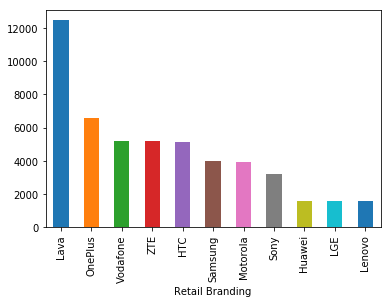

In [51]:
df1.monthly_mb.plot(kind='bar')

In [52]:
df2 = full_df.groupby("Marketing Name").sum()[['outgoing_mins_per_month',
                                               'outgoing_sms_per_month', 
                                               'monthly_mb']]

In [53]:
df2 = df2.sort_values('monthly_mb', ascending=False)

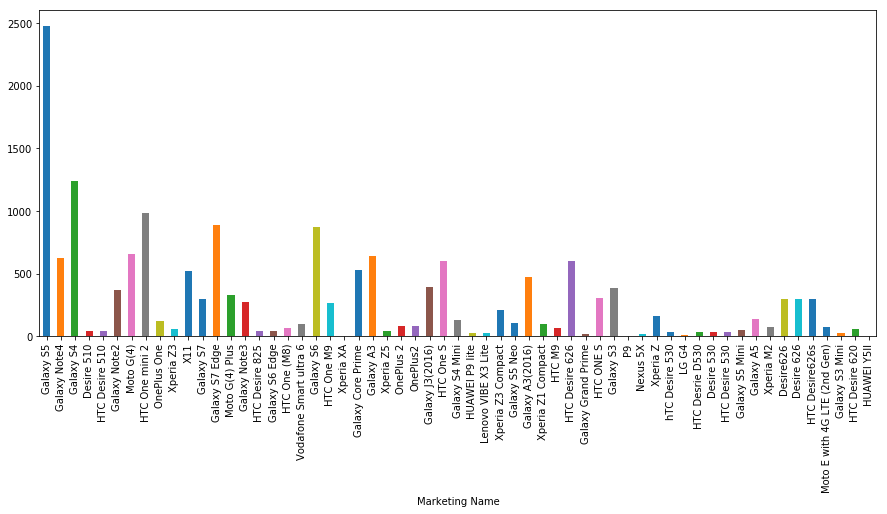

In [55]:
plt.figure(figsize=(15,6))
df2.outgoing_sms_per_month.plot(kind='bar')